# Исследование рынка общественного питания города Москвы

**Выполнила: Медведева Ольга**
**Дата: 24.05.2025**

<span style="font-size: 20px;">**Цель и задачи:**</span>

**Цель:** Провести исследовательский анализ данных рынка общественного питания города Москвы.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить данные более детально;
    - изучить количество бъектов общественного питания по каждой категории;
    - изучить распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы;
    - изучить соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения;
    - исследовать количество посадочных мест в заведениях;
    - изучить какие данные показывают самую сильную корреляцию с рейтингом заведений;
    - найти топ-15 популярных сетей в Москве;
    - изучить вариацию среднего чека заведения в зависимости от района Москвы.
4. Сформулировать выводы по проведённому анализу.


<span style="font-size: 20px;">**Данные:**</span>

Для анализа поступили данные о клиентах банка «Метанпром». Данные состоят из двух датасетов:

- `rest_info.csv` — информация о заведениях общественного питания;
- `rest_price.csv` —  информация о среднем чеке в заведениях общественного питания.

<span style="font-size: 15px;">**Описание датасета `rest_info`**</span>

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - 0 — заведение не является сетевым;
    - 1 — заведение является сетевым.
- `seats` — количество посадочных мест.

<span style="font-size: 15px;">**Описание датасета `rest_price`**</span>

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».
    - и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.


<span style="font-size: 20px;">**Структура проекта:**</span>

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

## Загрузка данных и знакомство с ними

Начнём с загрузки библиотек и датасетов `rest_info` и `rest_price`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `info_df` и `price_df`.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [2]:
# Выгружаем данные в переменные info_df и price_df
info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
# Выводим первые строки датафрейма на экран
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выводим информацию о датафрейме
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 6406 строк, в которых представлена информация о заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов единообразны и соответствуют snake_case.
- Некоторые данные, а именно столбцы `id`, `name`, `category`, `address`, `district` и `hours` хранятся в типах данных `object`, что им подходит. Столбцы `rating` и `seats` хранятся в типе данных `float64`, что также им подходит, но следует уменьшить размерность, а также, столбец `seats` можно было бы перевести в целочисленный тип данных `int`, но в таком случае, потерялись бы пропущенные значения. Столбец `chain` показывает наличие у клиента того или иного признака и содержит значения 1 или 0 — размерность этих данных также можно оптимизировать.
- Пропуски содержатся в двух столбцах `hours` и `seats`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `rest_price.csv`.

In [5]:
# Выводим первые строки датафрейма на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания. По аналогии с предыдущим датасетом можно отметить, что:

- Названия столбцов единообразны и соответствуют snake_case.
- Типы данных соответствуют содержимому. Типы данных для столбцов `middle_avg_bill` и `middle_coffee_cup` можно оптимизировать с понижением размерности.
- Пропуски имеются почти во всех столбцах (`price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup`).
- Значения в столбцах соответствуют описанию.

Первичное знакомство показывает, что данные не самого хорошего качества — в них часто встречаются пропущенные значения, но сами данные соответствуют описанию и выглядят корректными. Настало время объединить данные из двух датасетов в один и перейти к следующему этапу — предобработке данных.

---

In [7]:
df = info_df.merge(price_df, how='left', on='id')

df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


Проверим что после присоединения таблиц ничего не потерялось:

In [8]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


## Предобработка данных

### Оптимизируем типы данных

С данными точек общественного здесь работы не так много — понадобится только провести оптимизацию целочисленных и вещественных данных.
Для оптимизации будем использовать метод `pd.to_numeric` с аргументом `downcast='float'` и `downcast='integer'`:

In [9]:
# Оптимизируем вещественный тип данных в датафрейме df
for column in ['rating', 'seats', 'middle_avg_bill', 'middle_coffee_cup']:
    df[column] = pd.to_numeric(df[column],
                                    downcast='float')

# Оптимизируем целочисленный тип данных в датафрейме df
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')


In [10]:
# Проверим типы данных в датафрейме df с помощью атрибута dtypes
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float32
chain                   int8
seats                float32
price                 object
avg_bill              object
middle_avg_bill      float32
middle_coffee_cup    float32
dtype: object

Типы данных были успешно оптимизированы с понижением размерности целочисленных и вещественных данных.

### Проверяем наличие пропусков в данных

При первичном анализе мы обнаружили пропуски в столбце `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup` датафрейма `df`. Узнаем абсолютное и относительное количество пропусков в этих столбцах.

In [11]:
# Применяем метод isna() к датафрейму df
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [12]:
# Подсчитываем долю строк с пропусками
df.isna().sum() / df.shape[0]

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

В датафрейме `df` обнаружено 3611 пропусков в столбце `seats` — это 43% данных и 536 пропусков в столбце `hours` — это 6% данных. Количество пропусков достаточно большое, чтобы их просто удалить.

Пропуски в данных столбцах могут быть вызваны:
- Количество мест в точке общественного питания может изменяться, могут добавляться и убавляться места, в точке общественного питания вообще может не быть мест, если это доставка, а также, во время сбора данных могло происходить изменение в графике работы, но у нас нет информации чтобы это проверить.
- При обработке данных произошёл технический сбой. Технические ошибки могут привести к пропускам в данных.
- Точка общественного питания закрылась и нет возможности собрать эти данные.
    
Чтобы разобраться с причиной пропусков, обычно анализируют возможные взаимосвязи пропусков с другими данными. Для этого добавим новый столбец-признак `is_seats`, который укажет на наличие пропуска в столбце `seats`.

Напишем небольшую функцию:

In [13]:
# Определяем функцию, которая создаст новый столбец с бинарным признаком в зависимости от наличия данных в другом столбце
def create_is_na(x):
    """
    Функция создаёт новый столбец с бинарным признаком, который указывает
    на наличие данных в столбце. Функция применяется к столбцу после метода isna()
    """
    if x:
        return 0
    return 1

Функция применяется к столбцу, в котором следует проверить данные, после метода `isna()`. Этот метод проверяет пропуски в данных и, если пропуск есть, возвращает `True`. В случае `True` срабатывает условие `if x` — функция возвращает 0, что означает, что в столбце нет данных. Если пропуска нет, метод `isna()` вернёт `False`. Тогда условие `if x` не сработает, и код вернёт 1. Применим эту функцию к столбцу `seats` и создадим новый столбец `is_seats`:

In [14]:
# Создаём столбец is_seats с помощью функции create_is_na
df['is_seats'] = info_df['seats'].isna().apply(create_is_na)

После того как столбец-признак `is_seats` был создан, можно создать сводную таблицу. Это поможет получить долю точек общепита с пропуском и без пропуска в столбце `seats`.

In [15]:
df.pivot_table(values='is_seats', index='chain', columns='category', aggfunc='mean')

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
chain,,,,,,,,
0,0.598993,0.555556,0.590296,0.493433,0.493506,0.590759,0.614623,0.528634
1,0.656805,0.592357,0.560345,0.550706,0.568056,0.751515,0.634247,0.500000


По сводной таблице видно, что сильной зависимости отсутствия значений в столбце `seats` и значениями по столбцам `category` и `chain` нет.

---
Аналогично проверим и пропуски в столбце `hours`.

In [16]:
# Создаём столбец is_hours с помощью функции create_is_na
df['is_hours'] = df['hours'].isna().apply(create_is_na)

<AxesSubplot:xlabel='chain', ylabel='category'>

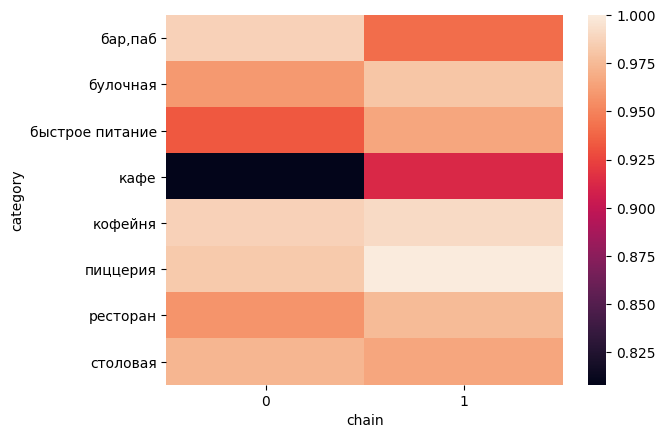

In [17]:
sns.heatmap(df.pivot_table(values='is_hours', index='category', columns='chain', aggfunc='mean'))

Зависимости пропусков в столбце `hours` и значениями по столбцам `category` и `chain` не наблюдается.

В датафрейме `df` также обнаружено 7871 пропуск в столбце `middle_coffee_cup` — это 94% данных, 5257 пропусков в столбце `middle_avg_bill` — это 63% данных, 4590 пропуска в столбце `avg_bill` — это 55% и 5091 пропуска в столбце `price` — это 61%. Во всех столбцах кроме `id` имеются пропуски значений.

Пропуски во всех столбцах связаны c объединением двух датафреймов (датафрейм `price_df` изначально имел меньшее количество строк), а также, с видом заполнения столбца `avg_bill`, так как на основе него и вычислялись остальные столбцы. Например, если в столбце `avg_bill` указано `Цена чашки капучино:155–185 ₽`, то можно заполнить только столбец `middle_coffee_cup`, но мы не знаем что вставить в столбец `middle_avg_bill` и по одной чашке не вычислишь категорию цен для столбца `price`.

In [18]:
df['is_avg_bill'] = df['avg_bill'].isna().apply(create_is_na)

<AxesSubplot:xlabel='chain', ylabel='category'>

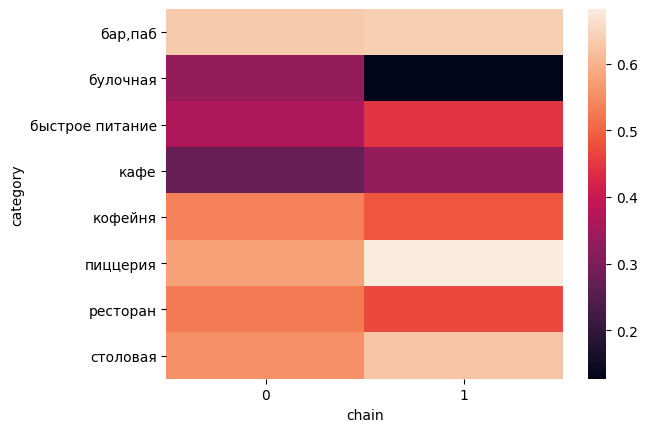

In [19]:
sns.heatmap(df.pivot_table(values='is_avg_bill', index='category', columns='chain', aggfunc='mean'))

По тепловой карте видно, что сильной зависимости отсутствия значений в столбце `avg_bill` и значениями по столбцам `category` нет, но в сетевых заведениях (столбец `chain`) чаще присутстует информация о среднем чеке.

Далее нормализуем данные по названию заведения:

In [20]:
def normalize_name(name):
    """
    Функция нормализцет названия точек общественно питания.
    Пример: строка Яндекс.Лавка станет яндекс лавка.
    В качестве аргументов принимает строку.
    Возвращает строку приведенную к нижнему регистру с замененным знаком '.' на ' '.
    """
    str_bad = name.strip().lower().replace('.', ' ')
        
    return str_bad

In [21]:
df['name'] = df['name'].apply(normalize_name)

Проверим, встречаются ли в данных значения-индикаторы, которые можно рассматривать как пропуски. Иногда для анализа поступают уже частично или полностью подготовленные данные. Если аналитик не знает, по какому алгоритму происходили первичный сбор и обработка данных, лучше дополнительно проверить, использовались ли значения-индикаторы для замены пропусков. Это поможет понять качество данных и избежать ошибок при их агрегации, когда значение-индикатор будет учитываться при расчёте среднего или медианы, что исказит исходные данные.

In [22]:
# Проверяем уникальные значения в столбцах
for column in ['category', 'chain', 'rating', 'price']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце chain:
[0 1]

Уникальные значения в столбце rating:
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5. ]

Уникальные значения в столбце price:
['высокие' 'выше среднего' 'низкие' 'средние' nan]



Все значения выглядят корректными.

В шести столбцах (`hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`) были обнаружены пропущенные значения. Максимальное процент пропущенных данных в столбце `middle_coffee_cup` — 94%.

Были частично заполнены пропущенные значения в столбцах `avg_bill`, `price` на основе моды по столбцам `name`, `category` и `chain`. Всего было заполнено 997 пропуска в столбце `avg_bill` и 1165 пропусков в столбце `price`.

По итогам изучения датафрейма и пропусков было решено не удалять и не заполнять оставшиеся пропущенные значения, так как у нас попросту нет информации чтобы заполнить данные пропуски, а также излишняя обработка данных может негативно сказаться на достоверности этих данных.

На данном этапе также можно создать столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
- логическое значение True — если заведение работает ежедневно и круглосуточно;
- логическое значение False — в противоположном случае.

In [23]:
def is_working_24_7(hours):
    str_hours = hours
    if isinstance(str_hours, float):
        return 0
    elif str_hours.strip() == 'ежедневно, круглосуточно':
        return 1
    else:
        return 0

df['is_24_7'] = df['hours'].apply(is_working_24_7)
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_seats,is_hours,is_avg_bill,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,0,1,0,0
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,1,1,1,0
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,1,1,1,0
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,1,1,0
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,1,1,0


### Проверяем наличие дубликатов

Сначала проверим на наличие явных дубликатов, а далее имеет смысл поиск неявных дубликатов по двум столбцам `name`, `address`.

In [24]:
# Удаления явных дубликатов
df_row_count = df.shape[0]
df = df.drop_duplicates()
obvious_duplicate_count = df_row_count - df.shape[0]

# Удаление неявных дубликатов по названию и адресу
df = df.drop_duplicates(['name', 'address'])

not_obvious_duplicate_count = df_row_count - df.shape[0] - obvious_duplicate_count

print(f'Было найдено {obvious_duplicate_count} явных и {not_obvious_duplicate_count} неявных дубликата или {round((obvious_duplicate_count / df_row_count)*100, 2)}% явных и {round((not_obvious_duplicate_count / df_row_count)*100, 2)}% неявных дубликатов')

Было найдено 0 явных и 3 неявных дубликата или 0.0% явных и 0.04% неявных дубликатов


### Итоги по предобработке данных

In [25]:
# Заново выгрузим данные в новые переменные
comparison_info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
comparison_price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

# Соединим 2 датафрейма вместе
comparison_df = comparison_info_df.merge(comparison_price_df, on='id', how='left')

print(f"Всего в датафрейме было {comparison_df.shape[0]} строк, после окончания предобработки данных осталось {df.shape[0]}, то есть было удалено {comparison_df.shape[0] - df.shape[0]} строки.")

Всего в датафрейме было 8406 строк, после окончания предобработки данных осталось 8403, то есть было удалено 3 строки.


При предобработке данных были проведены следующие действия:
- Корректировка типа данных:
    - Для оптимизации работы с данными в датафрейме были произведены следующие изменения типов данных:
        - `rating`, `chain`, `middle_avg_bill`, `middle_coffee_cup` и `seats`: тип данных изменен не был, но была уменьшена разрядность с `float64` до `float32`, а также с `int64` на `int8`.
- Поиск пропущенных значений, нахождение причин пропусков и заполнение:
    - В восьми столбцах (`hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup`) были обнаружены  пропущенные значения. Максимальное процент пропущенных данных в столбце `middle_coffee_cup` — 94%;
    - Для проверки причин пропусков по столбцам `seats`, `hours`  `avg_bill` были созданы 3 столбца `is_seats`, `is_hours` и `is_avg_bill`;
    - Были нормализованы названия заведений (по столбцу `name`). Названия были приведены к нижнему регистру и были удалены лишние знаки `'.'` и заменены на `' '`;
    - Были частично заполнены пропущенные значения в столбцах `price` и `avg_bill` на основе моды значений по столбцам `name`, `category` и `chain`. Всего было заполнено 997 пропуска в столбце `avg_bill` и 1165 пропусков в столбце `price`.
- Для последующей работы был создан дополнительный столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно.
- Работа с дубликатами:
    - Всего были найдены и удалены 0 явных и 3 неявных дубликата. Поиск производился по столбцам `name` и `address`.

Во время предобработки было удалено 3 строки или 0.04% данных.

## Исследовательский анализ данных

Нам предстоит провести исследовательский анализ исходных данных и ответить на следующие на вопросы:

1. Какие категории заведений представлены в данных?
2. Какие административные районы Москвы присутствуют в данных?
3. Каких заведений больше — сетевых или несетевых?
4. Исследование посадочных мест в заведениях
5. Исследование рейтинга заведений
6. Исследование корреляции рейтинга заведений с другими данными
7. Топ-15 популярных сетей в Москве
8. Вариация среднего чека заведения в зависимости от района Москвы

### Какие категории заведений представлены в данных? 

Для ответа на данный вопрос построим линейчатую диаграмму на основе столбца `category` с подсчетом количества заведений в каждой категории.

Количество заведений в каждой категории (по убыванию):
category
кафе               2377
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: id, dtype: int64


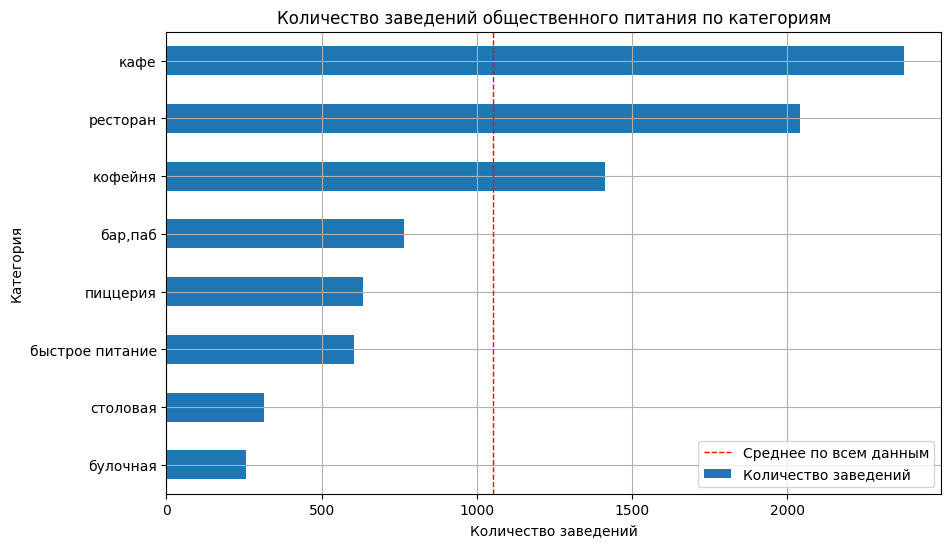

In [26]:
def amount_by_category_table():
    # Группируем данные по категории и подсчитываем количество вхождений
    return df.groupby('category')['id'].count().sort_values()

def amount_by_category_barh(grouped):
    # Строим столбчатую диаграмму
    grouped.plot(kind='barh',
                title='Количество заведений общественного питания по категориям',
                legend=True,
                rot=0,
                figsize=(10, 6))

    # Рассчитываем среднее количество вхождений
    mean_amount = grouped.mean()

    # Наносим на график линию со средним значением
    plt.axvline(mean_amount, color='red',
                linestyle='--', linewidth=1)

    plt.grid()
    plt.xlabel('Количество заведений')
    plt.ylabel('Категория')
    plt.legend(['Среднее по всем данным', 'Количество заведений'])
    plt.show()

grouped = amount_by_category_table()
print('Количество заведений в каждой категории (по убыванию):')
print(grouped.sort_values(ascending=False))
amount_by_category_barh(grouped)

Видно что наибольшее количество заведений представлено в категориях кафе - 2377, ресторан - 2042 и кофейня - 1413. Наименьшее количество заведений в категориях булочная - 256 и столовая - 315.

### Какие административные районы Москвы присутствуют в данных?

Для ответа на данный вопрос построим линейчатую диаграмму на основе столбца `district` с подсчетом количества заведений в каждой административном округе.

Количество заведений в каждом административном районе (по убыванию):
district
Центральный административный округ         2242
Северный административный округ             899
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: id, dtype: int64


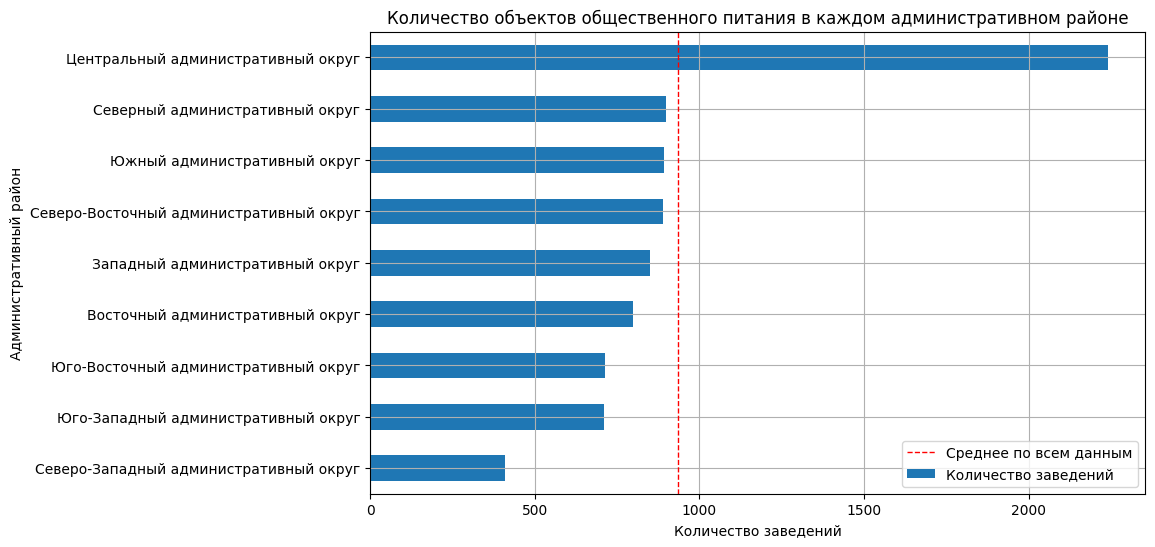

In [27]:
def amount_by_district_table():
    return df.groupby('district')['id'].count().sort_values()

def amount_by_district_barh(grouped):
    # Группируем данные по категории и подсчитываем количество вхождений
    grouped = df.groupby('district')['id'].count().sort_values()

    # Строим столбчатую диаграмму
    grouped.plot(kind='barh',
                title='Количество объектов общественного питания в каждом административном районе',
                legend=True,
                rot=0,
                figsize=(10, 6))

    # Рассчитываем среднее количество вхождений
    mean_amount = grouped.mean()

    # Наносим на график линию со средним значением
    plt.axvline(mean_amount, color='red',
                linestyle='--', linewidth=1)

    plt.grid()
    plt.xlabel('Количество заведений')
    plt.ylabel('Административный район')
    plt.legend(['Среднее по всем данным', 'Количество заведений'])
    plt.show()

grouped = amount_by_district_table()
print('Количество заведений в каждом административном районе (по убыванию):')
print(grouped.sort_values(ascending=False))
amount_by_district_barh(grouped)

На столбчатой диаграмме видно, что абсолютно наибольшее количество заведений общественного питания располагается в Центральном административном районе - 2242 точки, а наименьшее в Северо-Западном административном округе - 409 точек.

Теперь найдем распределение заведений по категориям в Центральном административном округе Москвы.

Количество объектов общественного питания по категориям в Центральном административном районе (по убыванию):
           category   id
46         ресторан  670
43             кафе  464
44          кофейня  428
40          бар,паб  364
45         пиццерия  113
42  быстрое питание   87
47         столовая   66
41         булочная   50


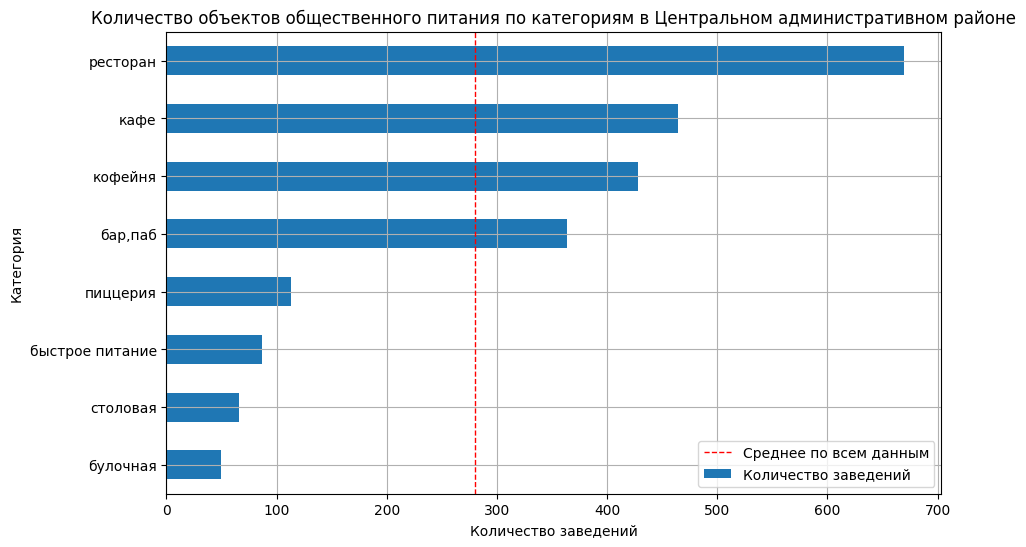

In [28]:
def amount_by_district_and_category_table():
    # Группируем данные по району и категории и подсчитываем количество вхождений, далее оставляем только данные по ЦАО
    grouped = df.groupby(['district', 'category'])['id'].count().reset_index()
    grouped = grouped[grouped['district'] == 'Центральный административный округ']
    grouped = grouped[['category', 'id']]
    return grouped.sort_values(by='id')

def amount_by_district_and_category_barh(grouped):
    
    # Строим столбчатую диаграмму
    grouped.plot(kind='barh',
                title='Количество объектов общественного питания по категориям в Центральном административном районе',
                legend=True,
                rot=0,
                figsize=(10, 6))

    # Рассчитываем среднее количество вхождений
    mean_amount = grouped['id'].mean()
    
    category_list = grouped['category'].to_list()

    plt.axvline(mean_amount, color='red',
                linestyle='--', linewidth=1)

    plt.grid()
    plt.xlabel('Количество заведений')
    plt.ylabel('Категория')
    plt.yticks(ticks=range(0, len(category_list)),labels=category_list)
    plt.legend(['Среднее по всем данным', 'Количество заведений'])
    plt.show()

grouped = amount_by_district_and_category_table()
print('Количество объектов общественного питания по категориям в Центральном административном районе (по убыванию):')
print(grouped.sort_values(by='id', ascending=False))
amount_by_district_and_category_barh(grouped)

По линейчатому графику видно, что больше всего в Центральном административном районе находится заведений категории 'ресторан' - 670 точек, 'кафе' - 464, 'кофейня' - 428, и 'бар,паб' - 364 точки.

Меньше всего в центре заведений категории 'булочная' - всего 50 точек.

### Каких заведений больше — сетевых или несетевых?

Перед нами стоит задача изучить соотношение сетевых и несетевых заведений в разрезе категорий заведения, а также понять какие категории заведений чаще являются сетевыми.

Для этого построим круговую диаграмму на основе количества вхождений и столбца `chain`.

Количество заведений в каждой категории (по убыванию):
        chain    id   perc
0  не сетевое  5200  61.88
1     сетевое  3203  38.12


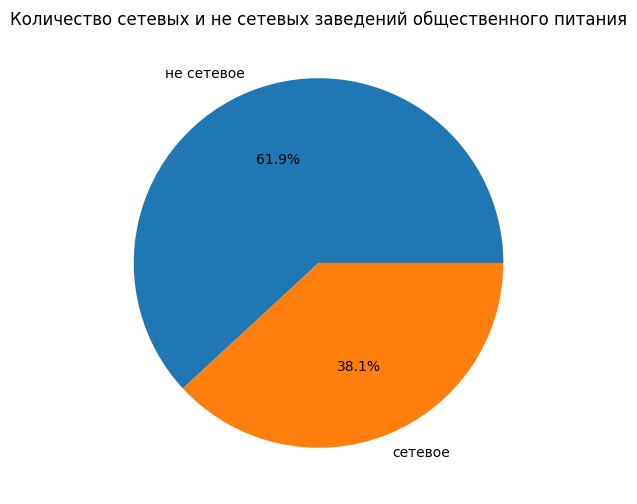

In [29]:
def share_by_chain_table():
    # Группируем данные по категории и подсчитываем количество вхождений
    grouped = df.groupby(['chain'])['id'].count().reset_index()
    grouped['chain'] = grouped['chain'].astype('object')
    grouped.loc[0, 'chain'] = 'не сетевое'
    grouped.loc[1, 'chain'] = 'сетевое'
    grouped['perc'] = round(grouped['id'] / grouped['id'].sum() * 100, 2)

    return grouped

def share_by_chain_pie(grouped):

    # Строим круговую диаграмму
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.pie(grouped['perc'], labels=grouped['chain'], autopct='%1.1f%%')
    
    plt.title('Количество сетевых и не сетевых заведений общественного питания')
    plt.show()

grouped = share_by_chain_table()
print('Количество заведений в каждой категории (по убыванию):')
print(grouped)
share_by_chain_pie(grouped)

Теперь построим нормированную столбчатую диаграмму на основе доли сетевых и не сетевых заведений по категориям, используя столбцы `chain` и `category`.

Количество заведений в каждой категории:


chain,category,not_chained_perc,chained_perc
0,"бар,паб",78.01,21.99
1,столовая,72.06,27.94
2,кафе,67.23,32.77
3,ресторан,64.30,35.70
4,быстрое питание,61.53,38.47
5,кофейня,49.04,50.96
6,пиццерия,47.87,52.13
7,булочная,38.67,61.33


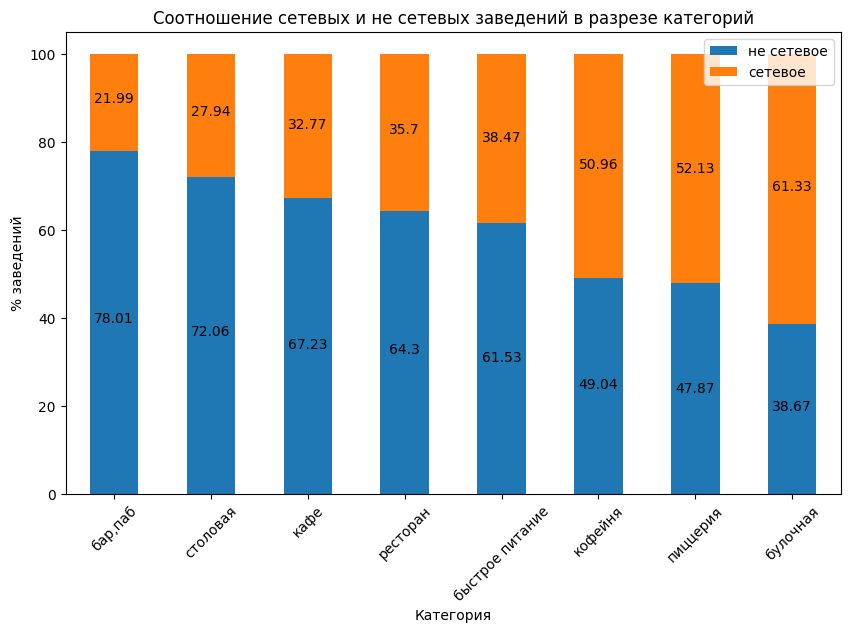

In [62]:
def amount_by_chain_and_category_table():
    # Группируем данные по категории и подсчитываем количество вхождений
    grouped = df.groupby(['category', 'chain'])['id'].count().unstack(fill_value=0).reset_index()

    # Выводим количество и соотношение текстом
    grouped['not_chained_perc'] = round(grouped[0] / (grouped[0] + grouped[1]) * 100, 2)
    grouped['chained_perc'] = round(grouped[1] / (grouped[0] + grouped[1]) * 100, 2)
    grouped = grouped.rename(columns={0: 'not_chained', 1: 'chained'})

    return grouped.sort_values(ascending=False,by='not_chained_perc')

def amount_by_chain_and_category_bar(grouped):
    grouped = grouped.reset_index()
    grouped = grouped[['category', 'not_chained_perc', 'chained_perc']]

    display(grouped)

    # Строим столбчатую диаграмму
    grouped.plot(kind='bar',
                 stacked=True,
                 title='Соотношение сетевых и не сетевых заведений в разрезе категорий',
                 legend=True,
                 rot=45,
                 figsize=(10, 6))
    
    list_of_category = grouped['category'].to_list()

    # Подписываем значения
    for i in range(len(list_of_category)):
        plt.text(i, grouped.loc[i, 'not_chained_perc'] // 2, grouped.loc[i, 'not_chained_perc'], ha='center')

    for i in range(len(list_of_category)):
        plt.text(i, (grouped.loc[i, 'not_chained_perc'] + 100) // 2, grouped.loc[i, 'chained_perc'], ha='center')

    # Настраиваем отображение
    plt.xlabel('Категория')
    plt.ylabel('% заведений')
    plt.xticks(range(0, len(list_of_category)), list_of_category)
    plt.legend(['не сетевое', 'сетевое'])
    plt.show()

grouped = amount_by_chain_and_category_table()
print('Количество заведений в каждой категории:')
#print(grouped)
amount_by_chain_and_category_bar(grouped)

На круговой диаграмме видно, что большее количество заведений НЕ сетевые - 61.9%. Чаще всего сетевыми заведениями являются булочные - 61.33%, а также кофейни - 50.96% и пиццерии 52.13%, наименьший процент сетевых заведений в категориях бар,паб - 21.99% и столовые - 27.94%.

### Исследование посадочных мест в заведениях

Стоит задача исследовать количество посадочных мест в заведениях, найти аномальные значения и выбросы и предположить причину таких значений, а также, привести наиболее типичные количество посадочных мест для разных категорий.

Для начала, построим диаграмму размаха количества посадочных мест по категориям, используя столбцы `seats` и `category`.

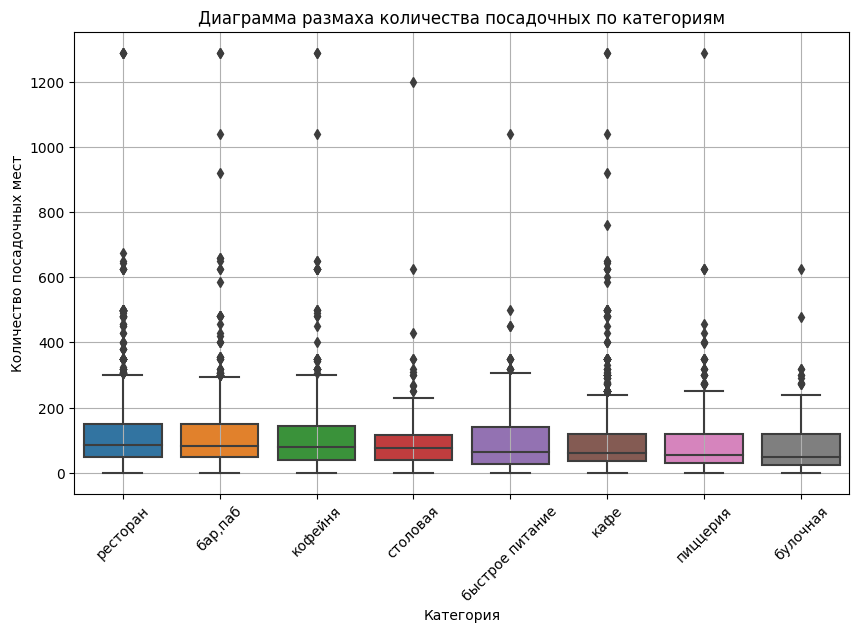

In [31]:
def boxplot_seats_by_category():
    grouped = df.groupby(['category'])['seats'].median().sort_values(ascending=False)

    # Строим диаграмму размаха
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['category'], y=df['seats'], order=grouped.index)

    # Настраиваем отображение
    plt.grid()
    plt.xlabel('Категория')
    plt.ylabel('Количество посадочных мест')
    plt.title('Диаграмма размаха количества посадочных по категориям')
    plt.xticks(rotation=45)
    plt.show()

boxplot_seats_by_category()

На диаграмме размаха видно, что в данных по столбцу `seats` присутствует большое количество выбросов в большую сторону. Это может быть как ошибкой связанной с некорректным сбором данных, так и быть корректными данными, учитывающими максимальную возможную вместимость.

Найдем типичное количество посадочных мест для заведений каждой категории, для этого найдем медианное значение, аналогично используя столбцы `seats` и `category`.

Количество заведений в каждой категории (по убыванию):
category
ресторан           86.0
бар,паб            82.0
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: float32


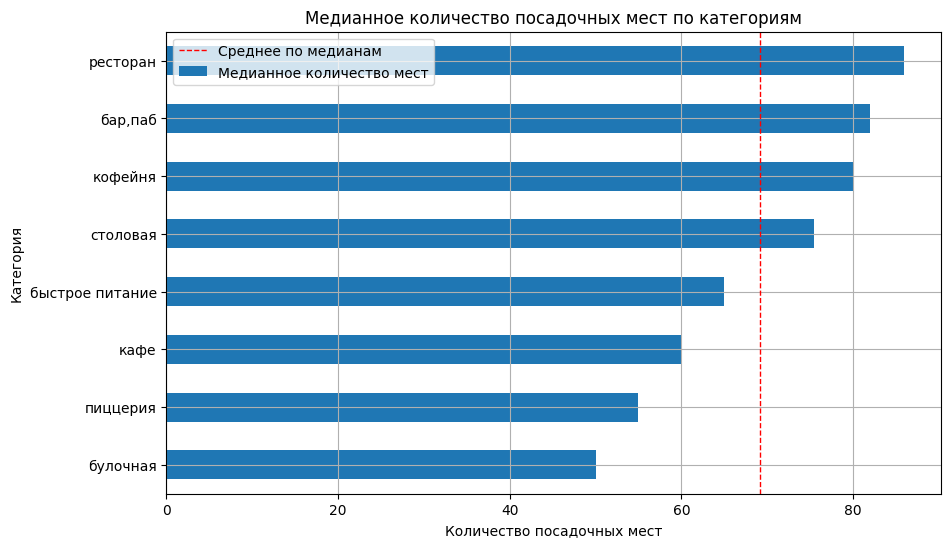

In [32]:
def median_seats_by_category_table():
    return df.groupby('category')['seats'].median().sort_values()

def median_seats_by_category_barh(grouped):
    # Строим столбчатую диаграмму
    grouped.plot(kind='barh',
                title='Медианное количество посадочных мест по категориям',
                legend=True,
                rot=0,
                figsize=(10, 6))

    # Рассчитываем среднее количество вхождений
    mean_amount = grouped.mean()

    # Наносим на график линию со средним значением
    plt.axvline(mean_amount, color='red',
                linestyle='--', linewidth=1)

    # Настраиваем отображение
    plt.grid()
    plt.xlabel('Количество посадочных мест')
    plt.ylabel('Категория')
    plt.legend(['Среднее по медианам', 'Медианное количество мест'])
    plt.show()

grouped = median_seats_by_category_table()
print('Количество заведений в каждой категории (по убыванию):')
print(grouped.sort_values(ascending=False))
median_seats_by_category_barh(grouped)

На линейчатой диаграмме, а также таблице выше, показано наиболее типичное или медианное количество мест для заведений по категориям. Для ресторана свойственно наибольшее количество мест - 86 мест, в то время как для булочной свойственно всего - 50 мест.

### Исследование рейтинга заведений

Поставлена задача исследовать рейтинг заведений, визуализировать распределение средних рейтингов по категориям заведений, а также ответить на вопрос: сильно ли различаются усредненные рейтинги для разных категорий заведений.

Построим линейчатую диаграмму средних рейтингов по категориям заведений, используя столбцы `rating` и `category`.

Средний рейтинг заведений в каждой категории (по убыванию):
category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290401
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.123896
быстрое питание    4.050249
Name: rating, dtype: float32


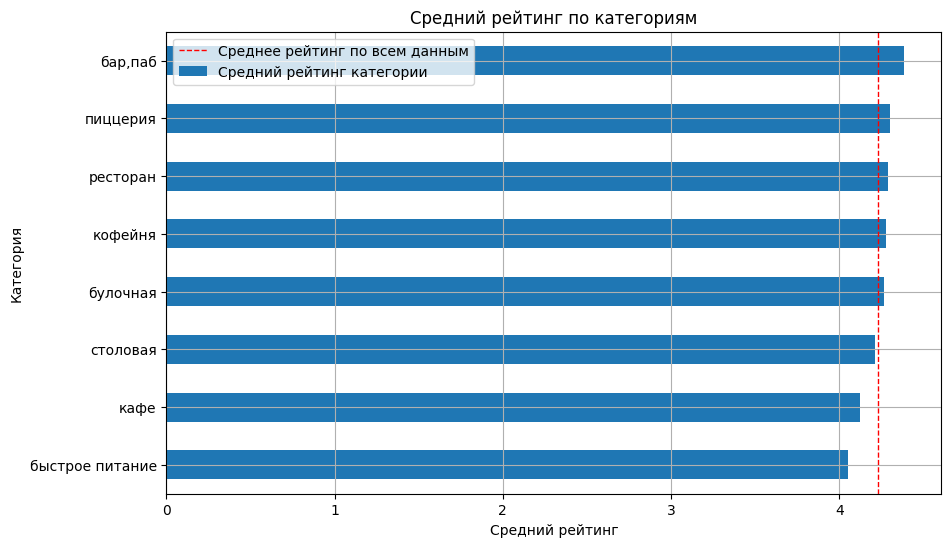

In [33]:
def mean_rating_by_category_table():
    return df.groupby('category')['rating'].mean().sort_values()

def mean_rating_by_category_barh(grouped):
    # Строим столбчатую диаграмму
    grouped.plot(kind='barh',
                title='Средний рейтинг по категориям',
                legend=True,
                rot=0,
                figsize=(10, 6))

    # Рассчитываем средний рейтинг
    mean_amount = df['rating'].mean()

    # Наносим на график линию со средним значением
    plt.axvline(mean_amount, color='red',
                linestyle='--', linewidth=1)

    # Настраиваем отображение
    plt.grid()
    plt.xlabel('Средний рейтинг')
    plt.ylabel('Категория')
    plt.legend(['Среднее рейтинг по всем данным', 'Средний рейтинг категории'])
    plt.show()

grouped = mean_rating_by_category_table()
print('Средний рейтинг заведений в каждой категории (по убыванию):')
print(grouped.sort_values(ascending=False))
mean_rating_by_category_barh(grouped)

Как мы видим по линейчатой диаграмме, усреднённые рейтинги для разных типов общепита различаются не сильно, все они состоят в пределах от 4.05 до 4.39.
Самый высокий средний рейтинг у заведений категории бар,паб, а самый низкий у заведений категории быстрое питание.

### Исследование корреляции рейтинга заведений с другими данными

Для нахождения корреляции значений по столбцу `rating` с другими данными (столбцы `category`, `district`, `chain`, `seats`, `price`, `is_24_7`) построим корреляционную матрицу, а далее тепловую карту.

In [34]:
def corr_matrix_rating():
    # Вычисляем корреляционную матрицу с использованием phi_k
    correlation_matrix = df[['category', 'district', 'chain', 'seats', 'price', 'is_24_7', 'rating']].phik_matrix()

    # Выводим результат
    print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
    return correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
data_heatmap = corr_matrix_rating()
display(data_heatmap)

Корреляционная матрица с коэффициентом phi_k для переменной rating
interval columns not set, guessing: ['chain', 'seats', 'is_24_7', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.262056
category,0.198917
district,0.189389
is_24_7,0.160864
chain,0.119061
seats,0.000000


interval columns not set, guessing: ['chain', 'seats', 'is_24_7', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


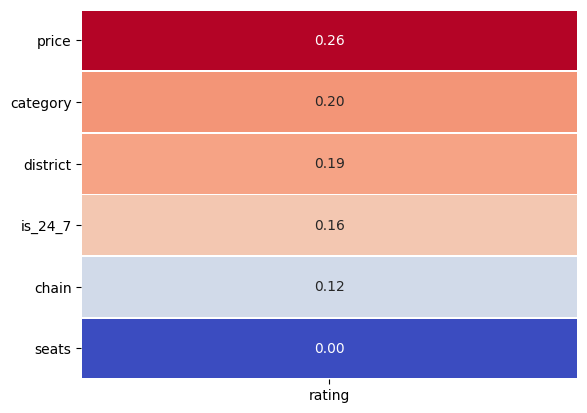

In [35]:
def rating_heat_map(data_heatmap):
    sns.heatmap(data_heatmap,
                annot=True,
                fmt='.2f',
                cmap='coolwarm',
                linewidths=0.5,
                cbar=False)
    plt.show()

data_heatmap = corr_matrix_rating()
rating_heat_map(data_heatmap)

Наибольшая зависимость рейтинга проявляется со столбцом `price`, но зависимость в 0.29 все еще оценивается как слабая. Также наблюдается слабая зависимость рейтинга от категории - 0.2 и месторапосположения заведения - 0.19.

Зависимости рейтинга от количества посадочных мест не наблюдается вообще.

Посмотрим как средний рейтинг зависит от ценовой категории:

Средний рейтинг заведений по ценовой категории (по убыванию):
price
высокие          4.436611
выше среднего    4.386348
средние          4.297874
низкие           4.173077
Name: rating, dtype: float32


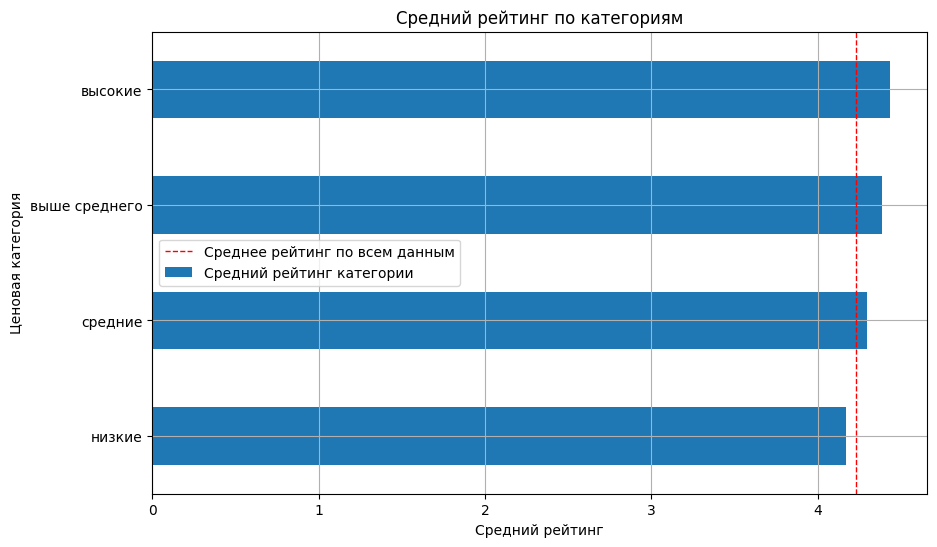

In [36]:
def rating_by_price_table():
    return df.groupby('price')['rating'].mean().sort_values()

def rating_by_price_barh(grouped):
    grouped.plot(kind='barh',
                title='Средний рейтинг по категориям',
                legend=True,
                rot=0,
                figsize=(10, 6))

    # Рассчитываем средний рейтинг
    mean_amount = df['rating'].mean()

    # Наносим на график линию со средним значением
    plt.axvline(mean_amount, color='red',
                linestyle='--', linewidth=1)

    # Настраиваем отображение
    plt.grid()
    plt.xlabel('Средний рейтинг')
    plt.ylabel('Ценовая категория')
    plt.legend(['Среднее рейтинг по всем данным', 'Средний рейтинг категории'])
    plt.show()

grouped = rating_by_price_table()
print('Средний рейтинг заведений по ценовой категории (по убыванию):')
print(grouped.sort_values(ascending=False))
rating_by_price_barh(grouped)

На диаграмме видно, что в среднем, чем выше ценовая категория, тем выше рейтинг заведения.

### Топ-15 популярных сетей в Москве

Нам нужно найти топ-15 популярных сетей в Москве, а также, посчитать средний рейтинг для этих сетей и определить к какой категории они относятся.
Под популярными понимается количество заведений сети в регионе, то есть, для нахождения топ-15 популярных сетей в Москве, нам нужно все заведения сгруппировать по названию.

Так как мы будем строить несколько визуализаций на основе одного и того же топа-15, сделаем универсальную функцию возвращающую этот топ в виде таблицы:

In [37]:
def get_top_15():
    # Группируем данные по названию и категории, считая количество вхождений, вычисляем средний рейтинг, 
    # сортируем по количеству вхождений по убыванию и оставляем только 15 верхних строк
    return df.groupby(['name', 'category']).agg({'id': 'count', 'rating': 'mean'}).reset_index().sort_values(by='id', ascending=False)[0:15]

In [38]:
print(get_top_15())

                                     name         category   id    rating
3038                                 кафе             кафе  159  3.854088
5869                          шоколадница          кофейня  119  4.178151
2713                       домино'с пицца         пиццерия   77  4.171429
2678                           додо пицца         пиццерия   74  4.286487
5945                         яндекс лавка         ресторан   72  3.855556
1202                     one price coffee          кофейня   72  4.069445
427                                 cofix          кофейня   65  4.075385
1343                                prime         ресторан   49  4.114285
3415                             кофепорт          кофейня   42  4.147619
3479  кулинарная лавка братьев караваевых             кафе   39  4.394872
5076                              теремок         ресторан   36  4.105556
4508                             ресторан         ресторан   33  4.315152
5754                               шау

Для топ-15 сетей можно составить линейчатую диаграмму по количеству заведений с каждым именем.

Топ-15 популярных сетей Москвы (по убыванию количества заведений в сети):
                                     name   id
3038                                 кафе  159
5869                          шоколадница  119
2713                       домино'с пицца   77
2678                           додо пицца   74
5945                         яндекс лавка   72
1202                     one price coffee   72
427                                 cofix   65
1343                                prime   49
3415                             кофепорт   42
3479  кулинарная лавка братьев караваевых   39
5076                              теремок   36
4508                             ресторан   33
5754                               шаурма   32
355                              cofefest   31
5525                              чайхана   26


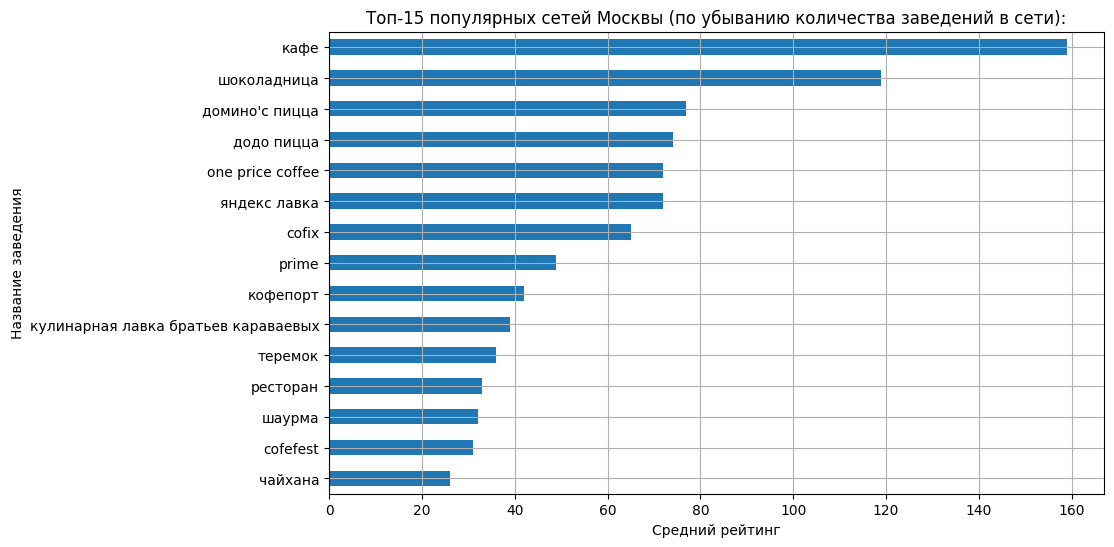

In [39]:
def top_15_chains_table():
    # Считаем количество заведений по названию
    return get_top_15()[['name', 'id']]

def top_15_chains_barh(grouped):
    grouped = grouped.sort_values(by='id')

    # Строим линейчатую диаграмму среднего рейтинга заведений в топ-15 по категориям
    grouped.plot(kind='barh',
                title='Топ-15 популярных сетей Москвы (по убыванию количества заведений в сети):',
                legend=False,
                rot=0,
                figsize=(10, 6))
    
    name_list = grouped['name'].to_list()

    # Настраиваем отображение
    plt.grid()
    plt.yticks(ticks=range(0, len(name_list)), labels=name_list)
    plt.xlabel('Средний рейтинг')
    plt.ylabel('Название заведения')
    plt.show()

grouped = top_15_chains_table()
print('Топ-15 популярных сетей Москвы (по убыванию количества заведений в сети):')
print(grouped)
top_15_chains_barh(grouped)

В топе оказались как известные сети, так и заведения не имеющие названия и собранные вместе, например 'кафе', 'шаурма', 'ресторан' и 'чайхана'. Топ-1 как раз заняло подобное собрание заведений 'кафе' - 159 точек с таким названием, на втором месте стоит 'шоколадница' -  119 точек.

Далее построим линейчатую диаграмму со средним рейтингом заведений:

Средний рейтинг по категориям в топ-15
                                     name    rating
3479  кулинарная лавка братьев караваевых  4.394872
4508                             ресторан  4.315152
2678                           додо пицца  4.286487
5869                          шоколадница  4.178151
2713                       домино'с пицца  4.171429
3415                             кофепорт  4.147619
1343                                prime  4.114285
5076                              теремок  4.105556
427                                 cofix  4.075385
1202                     one price coffee  4.069445
355                              cofefest  3.977419
5525                              чайхана  3.946154
5945                         яндекс лавка  3.855556
3038                                 кафе  3.854088
5754                               шаурма  3.850000


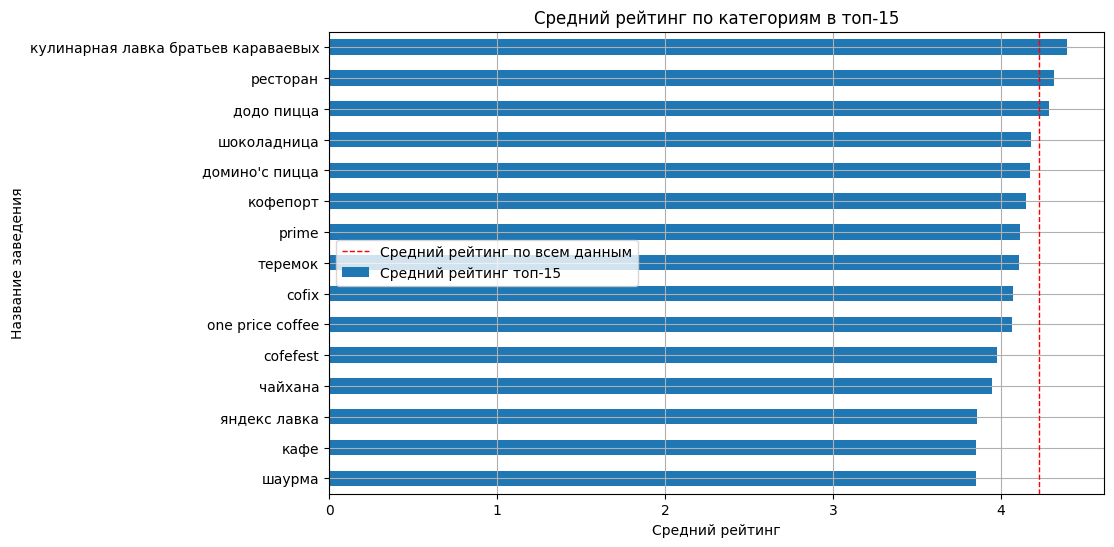

In [40]:
def top_15_mean_rating_table():
    # Считаем средний рейтинг по названию сети
    return get_top_15()[['name', 'rating']].sort_values(ascending=False, by='rating')

def top_15_mean_rating_bar(grouped):
    grouped = grouped.sort_values(by='rating')

    # Строим линейчатую диаграмму среднего рейтинга заведений в топ-15 по категориям
    grouped.plot(kind='barh',
                title='Средний рейтинг по категориям в топ-15',
                legend=True,
                rot=0,
                figsize=(10, 6))

    # Рассчитываем средний рейтинг по категориям в топ-15
    mean_value = df['rating'].mean()
    
    name_list = grouped['name'].to_list()

    # Наносим на график линию со средним значением
    plt.axvline(mean_value, color='red',
                linestyle='--', linewidth=1)

    # Настраиваем отображение
    plt.grid()
    plt.yticks(ticks=range(0, len(name_list)), labels=name_list)
    plt.xlabel('Средний рейтинг')
    plt.ylabel('Название заведения')
    plt.legend(['Средний рейтинг по всем данным', 'Средний рейтинг топ-15'])
    plt.show()

grouped = top_15_mean_rating_table()
print('Средний рейтинг по категориям в топ-15')
print(grouped)
top_15_mean_rating_bar(grouped)

Самой высоко оцененной сетью заведений оказалась 'кулинарная лавка братьев караваевых' со средней оценкой - 4.39, за ней идет 'ресторан' - 4.32 и 'додо пицца' - 4.29. У всех остальных сетей средний рейтинг заведений ниже, чем средний рейтинг по всем точкам питания.

Далее построим круговую диаграмму с долями категорий попавших в топ-15:

Количество заведений по категориям в топ-15
None
          category  name
2          кофейня     5
4         ресторан     4
1             кафе     3
3         пиццерия     2
0  быстрое питание     1


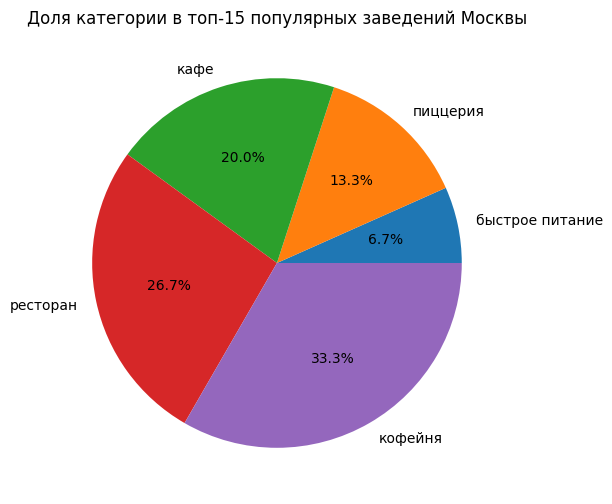

In [41]:
def top_15_amount_by_category_table():
    # Считаем количество сетей по категориям
    grouped = get_top_15().groupby(['category'])['name'].count().reset_index().sort_values(ascending=False, by='name')

def top_15_amount_by_category_pie(grouped):
    # Считаем количество сетей по категориям
    grouped = get_top_15().groupby(['category'])['name'].count().reset_index().sort_values(ascending=False, by='name')

    print(grouped)

    grouped = grouped.sort_values(by='name')

    # Строим круговую диаграмму доли заведений в топ-15 по категориям
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.pie(grouped['name'], labels=grouped['category'], autopct='%1.1f%%')    

    # Настраиваем отображение
    plt.title('Доля категории в топ-15 популярных заведений Москвы')
    plt.show()

grouped = top_15_amount_by_category_table()
print('Количество заведений по категориям в топ-15')
print(grouped)
top_15_amount_by_category_pie(grouped)

Больше всего в топе-15 оказалось заведений категории 'кофейня' - 33.3%, на втором месте 'ресторан' - 26.7%, наименее представленной оказалась категория - 'быстрое питание' - 6.7%.

### Вариация среднего чека заведения в зависимости от района Москвы

Нужно проанализировать цены в центральном административном округе и других. И ответить на вопрос, как удалённость от центра влияет на цены в заведениях.

Для этого сгруппируем данные по районам и посчитаем средний чек по столбцу `middle_avg_bill`, и составим линейчатую диаграмму:

Средний чек в заведении по району
                                  district  middle_avg_bill
5       Центральный административный округ      1191.057495
1          Западный административный округ      1053.225464
2          Северный административный округ       927.959656
8             Южный административный округ       834.398071
4   Северо-Западный административный округ       822.222900
0         Восточный административный округ       820.626953
7      Юго-Западный административный округ       792.561707
3  Северо-Восточный административный округ       716.611267
6     Юго-Восточный административный округ       654.097961


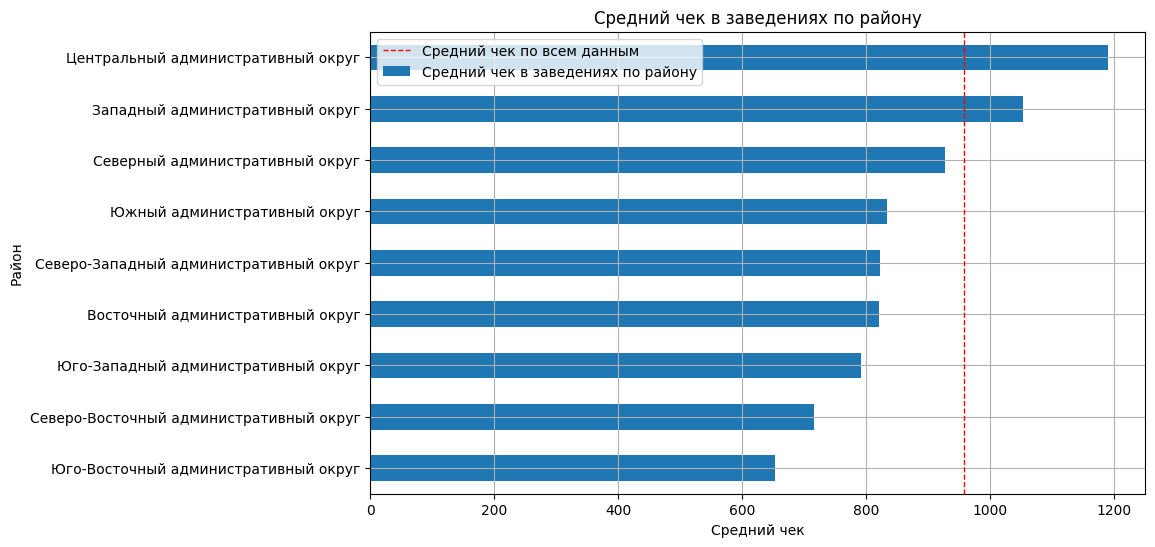

In [42]:
def mean_avg_bill_by_district_table():
    # Считаем средний чек по районам
    return df.groupby(['district'])['middle_avg_bill'].mean().reset_index().sort_values(ascending=False, by='middle_avg_bill')

def mean_avg_bill_by_district_barh(grouped):
    grouped = grouped.sort_values(by='middle_avg_bill')

    # Строим линейчатую диаграмму среднего чека заведений по районам
    grouped.plot(kind='barh',
                title='Средний чек в заведениях по району',
                legend=True,
                rot=0,
                figsize=(10, 6))

    # Рассчитываем средний чек по всем данным
    mean_value = df['middle_avg_bill'].mean()
    
    name_list = grouped['district'].to_list()

    # Наносим на график линию со средним значением
    plt.axvline(mean_value, color='red',
                linestyle='--', linewidth=1)

    # Настраиваем отображение
    plt.grid()
    plt.yticks(ticks=range(0, len(name_list)), labels=name_list)
    plt.xlabel('Средний чек')
    plt.ylabel('Район')
    plt.legend(['Средний чек по всем данным', 'Средний чек в заведениях по району'])
    plt.show()

grouped = mean_avg_bill_by_district_table()
print('Средний чек в заведении по району')
print(grouped)
mean_avg_bill_by_district_barh(grouped)

На линейчатой диаграмме видно, что заведения с самым большим средним чеком - 1191 руб., находятся в Центральном административном округе, то есть в центре города. Далее идет Западный административный округ - 1053 руб. И самый низкий средний чек в Юго-Восточный административном округе - 654 руб.

<img src="https://mosday.ru/maps/regions.jpg" width="600" align="center">

### (доп) Вариация среднего чека заведения в зависимости от категории заведения

Для более полного представления рынка, хотелось бы также понять, как варьируется средний чек в зависимости от категории заведения.

Средний чек в заведении по категориям
          category  middle_avg_bill
6         ресторан      1367.881714
0          бар,паб      1338.762207
5         пиццерия       789.377197
3             кафе       707.753601
1         булочная       658.773560
4          кофейня       614.210022
2  быстрое питание       445.763702
7         столовая       335.348053


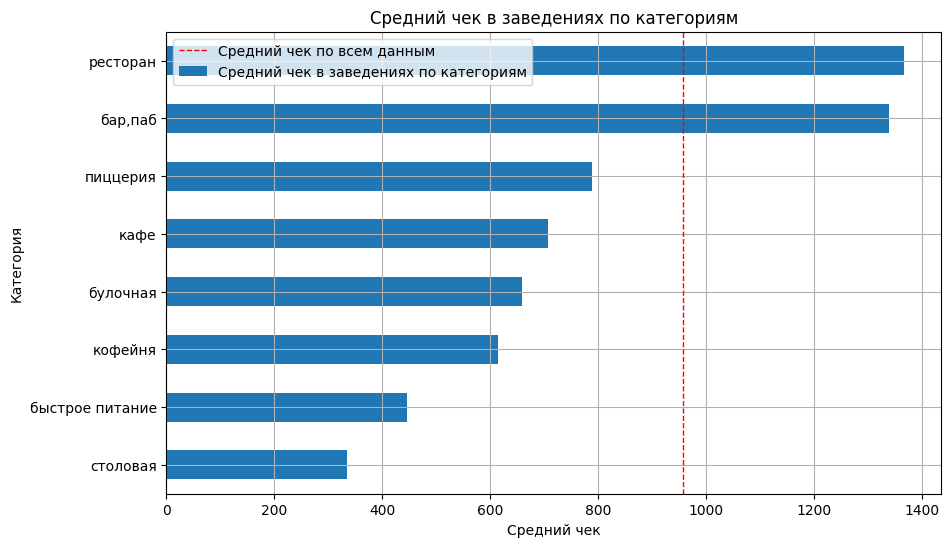

In [43]:
def mean_avg_bill_by_category_table():
    # Считаем средний чек по районам
    return df.groupby(['category'])['middle_avg_bill'].mean().reset_index().sort_values(ascending=False, by='middle_avg_bill')

def mean_avg_bill_by_category_barh(grouped):
    grouped = grouped.sort_values(by='middle_avg_bill')

    # Строим линейчатую диаграмму среднего чека заведений по районам
    grouped.plot(kind='barh',
                title='Средний чек в заведениях по категориям',
                legend=True,
                rot=0,
                figsize=(10, 6))

    # Рассчитываем средний чек по всем данным
    mean_value = df['middle_avg_bill'].mean()
    
    name_list = grouped['category'].to_list()

    # Наносим на график линию со средним значением
    plt.axvline(mean_value, color='red',
                linestyle='--', linewidth=1)

    # Настраиваем отображение
    plt.grid()
    plt.yticks(ticks=range(0, len(name_list)), labels=name_list)
    plt.xlabel('Средний чек')
    plt.ylabel('Категория')
    plt.legend(['Средний чек по всем данным', 'Средний чек в заведениях по категориям'])
    plt.show()

grouped = mean_avg_bill_by_category_table()
print('Средний чек в заведении по категориям')
print(grouped)
mean_avg_bill_by_category_barh(grouped)

На линейчатом графике видно что 2 категории занимают лидирующее место по величине среднего чека: ресторан - 1368 руб. и бар,паб - 1339 руб.. Наименьший средний чек представлен категорией столовая - 335 руб.

## Общий обзор проделанной работы

В ходе исследования проанализировали данные 8406 точек общественного питания города Москвы. Данные включали информацию заведений, графика работы, категории, местоположения, цены и т.д.. Был произведена предобработка данных и общий исследовательский анализ с целью изучения нового рынка.

При предобработке данных были проведены следующие действия:
- Корректировка типа данных:
    - Для оптимизации работы с данными в датафрейме были произведены следующие изменения типов данных:
        - `rating`, `chain`, `middle_avg_bill`, `middle_coffee_cup` и `seats`: тип данных изменен не был, но была уменьшена разрядность с `float64` до `float32`, а также с `int64` на `int8`.
- Поиск пропущенных значений, нахождение причин пропусков и заполнение:
    - В восьми столбцах (`hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup`) были обнаружены  пропущенные значения. Максимальное процент пропущенных данных в столбце `middle_coffee_cup` — 94%;
    - Для проверки причин пропусков по столбцам `seats`, `hours`  `avg_bill` были созданы 3 столбца `is_seats`, `is_hours` и `is_avg_bill`;
    - Были нормализованы названия заведений (по столбцу `name`). Названия были приведены к нижнему регистру и были удалены лишние знаки `'.'` и заменены на `' '`;
    - Были частично заполнены пропущенные значения в столбцах `price` и `avg_bill` на основе моды значений по столбцам `name`, `category` и `chain`. Всего было заполнено 997 пропуска в столбце `avg_bill` и 1165 пропусков в столбце `price`.
- Для последующей работы был создан дополнительный столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно.
- Работа с дубликатами:
    - Всего были найдены и удалены 0 явных и 3 неявных дубликата. Поиск производился по столбцам `name` и `address`.

Во время предобработки было удалено 3 строки или 0.04% данных.



Во время исследовательского анализа данных мы ответили на следующие вопросы:

### Какие категории заведений представлены в данных?

Для ответа на данный вопрос построили линейчатую диаграмму на основе столбца `category` с подсчетом количества заведений в каждой категории.

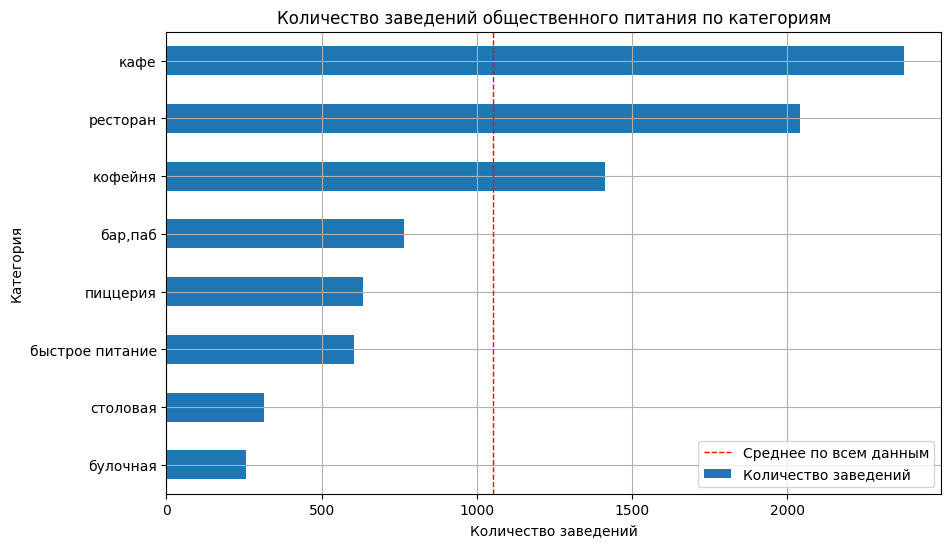

In [44]:
grouped = amount_by_category_table()
amount_by_category_barh(grouped)

Наибольшее количество заведений представлено в категориях кафе - 2377, ресторан - 2042 и кофейня - 1413. Наименьшее количество заведений в категориях булочная - 256 и столовая - 315.

### Какие административные районы Москвы присутствуют в данных?

Для ответа на данный вопрос построили линейчатую диаграмму на основе столбца `district` с подсчетом количества заведений в каждой административном округе.

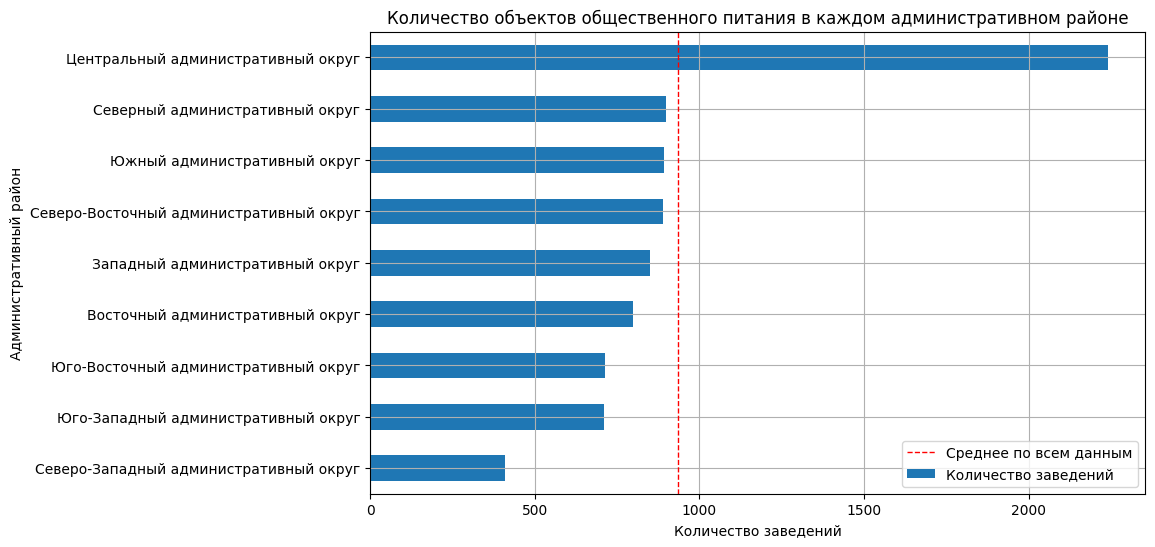

In [45]:
grouped = amount_by_district_table()
amount_by_district_barh(grouped)

Абсолютно наибольшее количество заведений общественного питания располагается в Центральном административном районе - 2242 точки, а наименьшее в Северо-Западном административном округе - 409 точек.

Также, построили распределение заведений по категориям в Центральном административном округе Москвы.

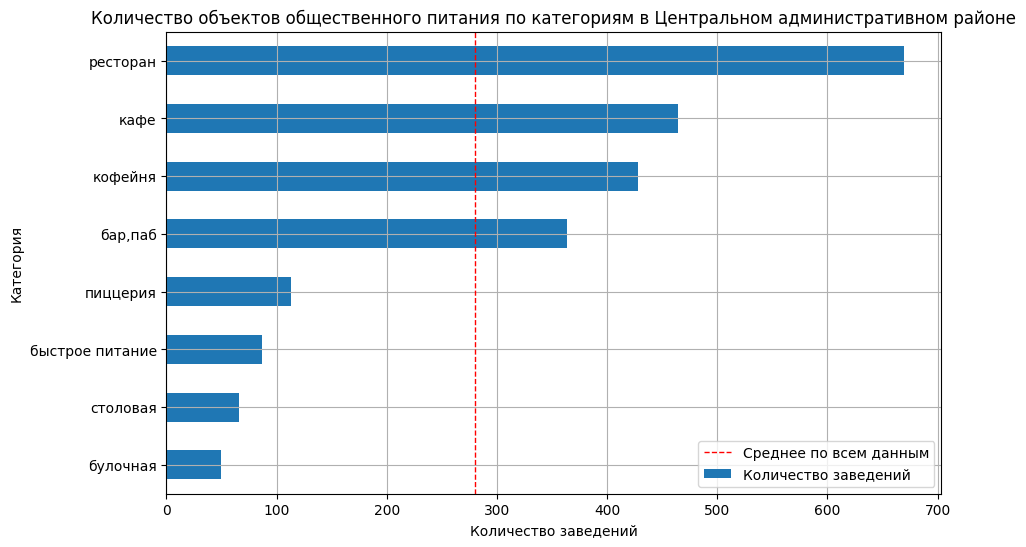

In [46]:
grouped = amount_by_district_and_category_table()
amount_by_district_and_category_barh(grouped)

По линейчатому графику видно, что больше всего в Центральном административном районе находится заведений категории 'ресторан' - 670 точек, 'кафе' - 464, 'кофейня' - 428, и 'бар,паб' - 364 точки.

Меньше всего в центре заведений категории 'булочная' - всего 50 точек.

### Каких заведений больше — сетевых или несетевых?

Перед нами стояла задача изучить соотношение сетевых и несетевых заведений в разрезе категорий заведения, а также понять какие категории заведений чаще являются сетевыми.

Для ответа на этот вопрос мы построили несколько диаграмм, первая из них: круговуя диаграмме на основе количества вхождений и столбца `chain`.

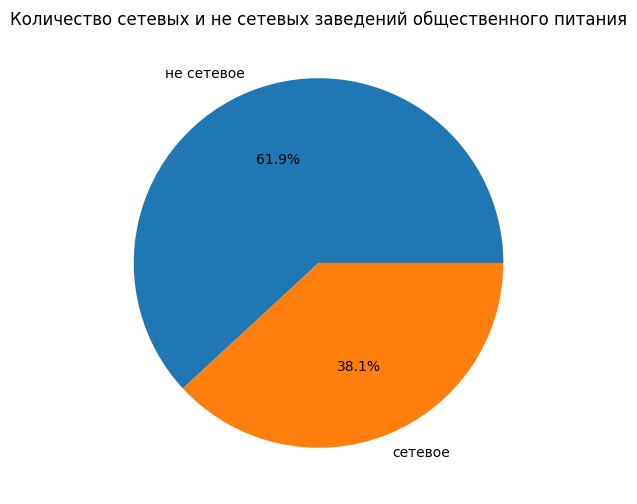

In [47]:
grouped = share_by_chain_table()
share_by_chain_pie(grouped)

Далее: нормированная столбчатая диаграмма на основе доли сетевых и не сетевых заведений по категориям, используя столбцы `chain` и `category`.

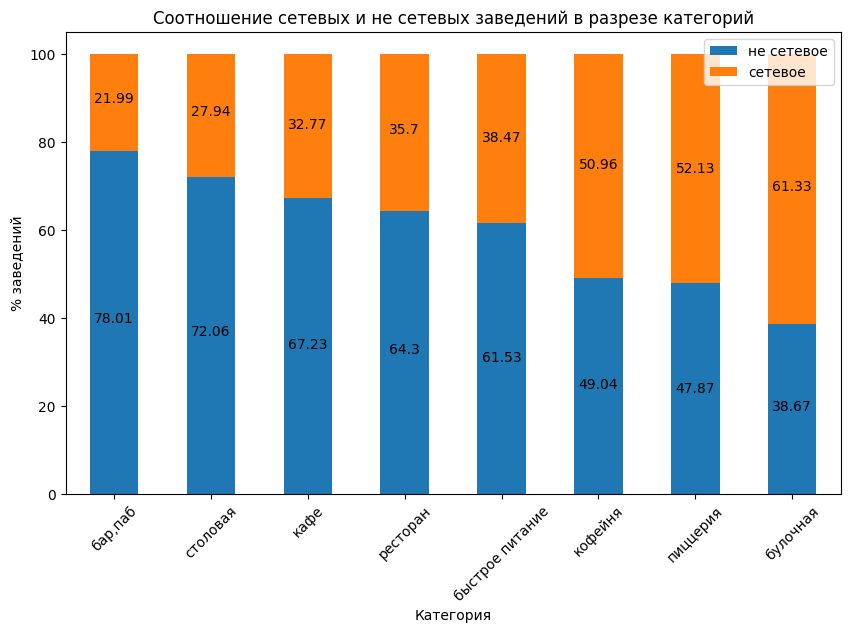

In [48]:
grouped = amount_by_chain_and_category_table()
amount_by_chain_and_category_bar(grouped)

На круговой диаграмме видно, что большее количество заведений НЕ сетевые - 61.9%. Чаще всего сетевыми заведениями являются булочные - 61.33%, а также кофейни - 50.96% и пиццерии 52.13%, наименьший процент сетевых заведений в категориях бар,паб - 21.99% и столовые - 27.94%.

### Исследование посадочных мест в заведениях

Стояла задача исследовать количество посадочных мест в заведениях, найти аномальные значения и выбросы и предположить причину таких значений, а также, привести наиболее типичные количество посадочных мест для разных категорий.

Для начала, построили диаграмму размаха количества посадочных мест по категориям, используя столбцы `seats` и `category`.

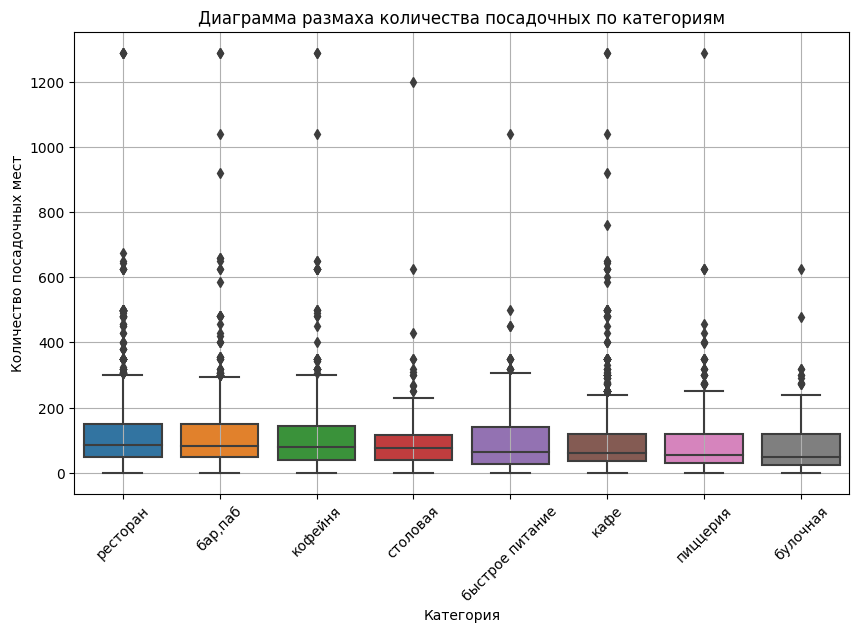

In [49]:
boxplot_seats_by_category()

На диаграмме размаха видно, что в данных по столбцу `seats` присутствует большое количество выбросов в большую сторону. Это может быть как ошибкой связанной с некорректным сбором данных, так и быть корректными данными, учитывающими максимальную возможную вместимость.

Далее нашли типичное количество посадочных мест для заведений каждой категории, для этого мы нашли медианное значение, аналогично используя столбцы `seats` и `category`.

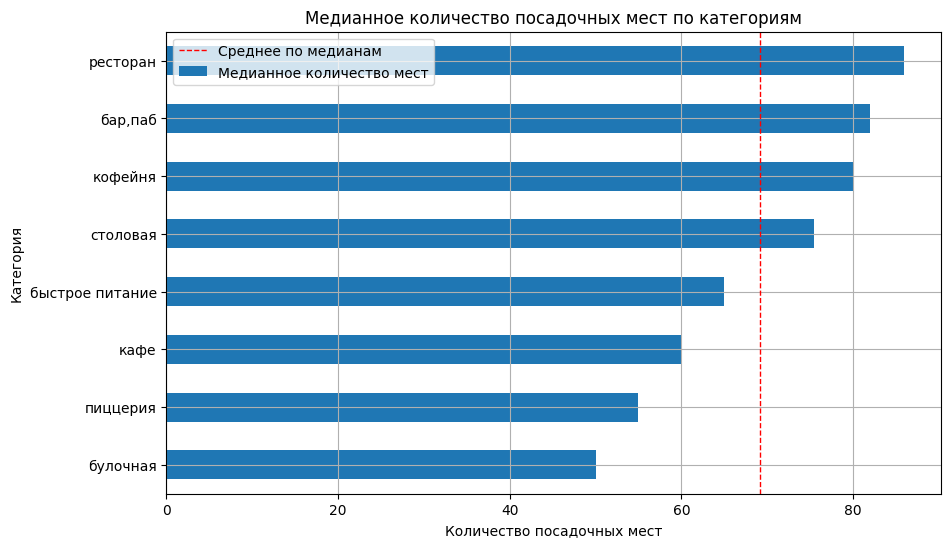

In [50]:
grouped = median_seats_by_category_table()
median_seats_by_category_barh(grouped)

На линейчатой диаграмме, показано наиболее типичное или медианное количество мест для заведений по категориям. Для ресторана свойственно наибольшее количество мест - 86 мест, в то время как для булочной свойственно всего - 50 мест.

### Исследование рейтинга заведений

Была поставлена задача исследовать рейтинг заведений, визуализировать распределение средних рейтингов по категориям заведений, а также ответить на вопрос: сильно ли различаются усредненные рейтинги для разных категорий заведений.

Для этого мы построили линейчатую диаграмму средних рейтингов по категориям заведений, используя столбцы `rating` и `category`.

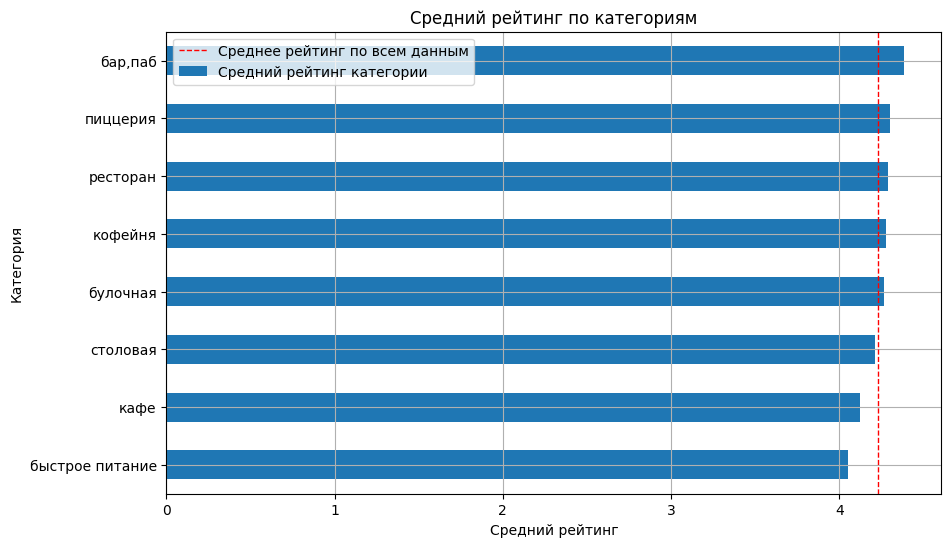

In [51]:
grouped = mean_rating_by_category_table()
mean_rating_by_category_barh(grouped)

Как видно по линейчатой диаграмме, усреднённые рейтинги для разных типов общепита различаются не сильно, все они состоят в пределах от 4.05 до 4.39.
Самый высокий средний рейтинг у заведений категории бар,паб, а самый низкий у заведений категории быстрое питание.

### Исследование корреляции рейтинга заведений с другими данными

Для нахождения корреляции значений по столбцу `rating` с другими данными (столбцы `category`, `district`, `chain`, `seats`, `price`, `is_24_7`) построиили корреляционную матрицу, и на основе ее - тепловую карту.

interval columns not set, guessing: ['chain', 'seats', 'is_24_7', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


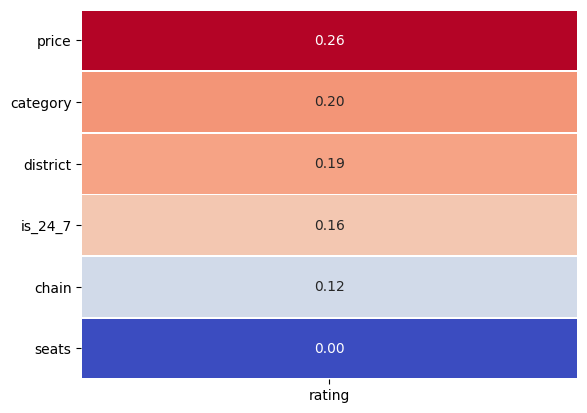

In [52]:
data_heatmap = corr_matrix_rating()
rating_heat_map(data_heatmap)

Наибольшая зависимость рейтинга проявляется со столбцом `price`, но зависимость в 0.29 все еще оценивается как слабая. Также наблюдается слабая зависимость рейтинга от категории - 0.2 и месторапосположения заведения - 0.19.

Зависимости рейтинга от количества посадочных мест не наблюдается вовсе.

Построили диаграмму, чтобы увидеть как средний рейтинг зависит от ценовой категории:

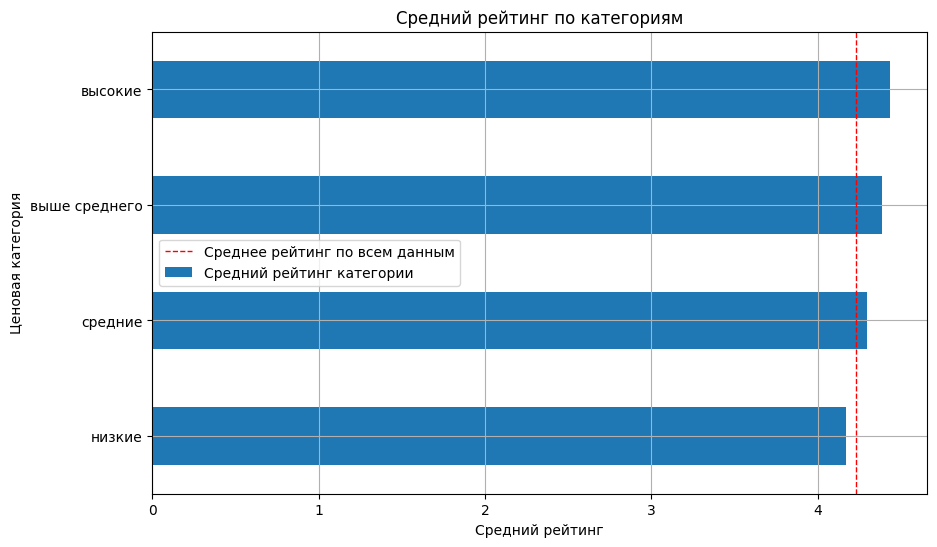

In [53]:
grouped = rating_by_price_table()
rating_by_price_barh(grouped)

На диаграмме видно, что в среднем, чем выше ценовая категория, тем выше рейтинг заведения.

### Топ-15 популярных сетей в Москве

Нам нужно было найти топ-15 популярных сетей в Москве, а также, посчитать средний рейтинг для этих сетей и определить к какой категории они относятся.
Под популярными понимается количество заведений сети в регионе, то есть, для нахождения топ-15 популярных сетей в Москве, нам нужно все заведения сгруппировать по названию.

Для ответов на эти вопросы было построего несколько визуализаций. Первая из них: можно составить линейчатую диаграмму по количеству заведений с каждым именем.

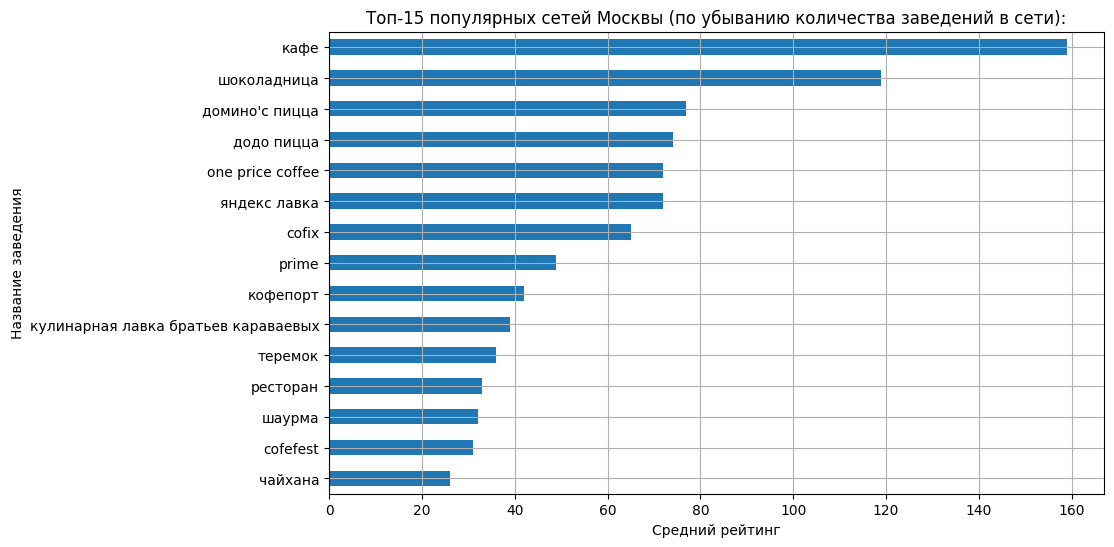

In [54]:
grouped = top_15_chains_table()
top_15_chains_barh(grouped)

В топе оказались как известные сети, так и заведения не имеющие названия и собранные вместе, например 'кафе', 'шаурма', 'ресторан' и 'чайхана'. Топ-1 как раз заняло подобное собрание заведений 'кафе' - 159 точек с таким названием, на втором месте стоит 'шоколадница' -  119 точек.

Далее построили линейчатую диаграмму со средним рейтингом заведений:

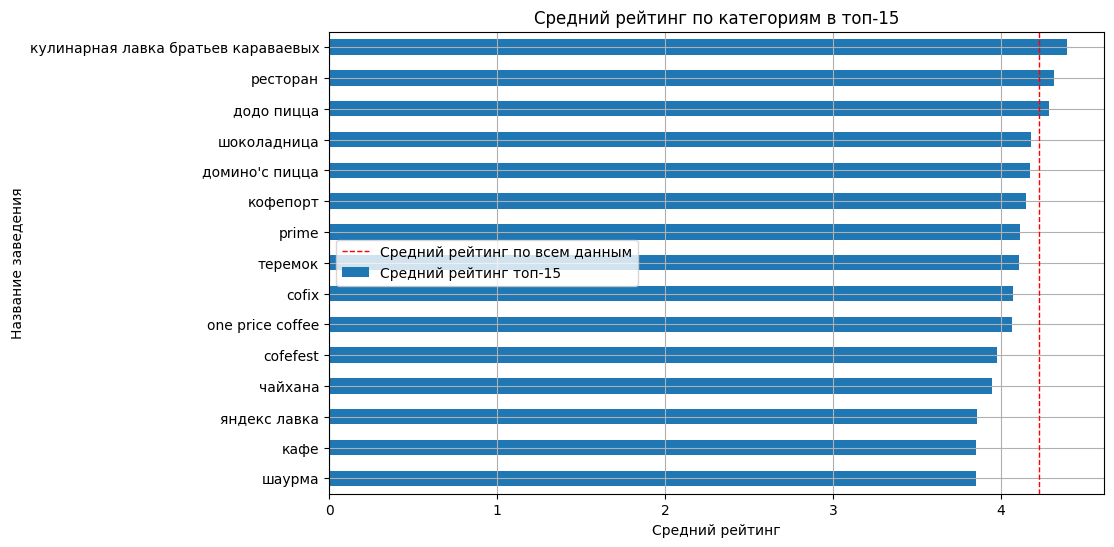

In [55]:
grouped = top_15_mean_rating_table()
top_15_mean_rating_bar(grouped)

Самой высоко оцененной сетью заведений оказалась 'кулинарная лавка братьев караваевых' со средней оценкой - 4.39, за ней идет 'ресторан' - 4.32 и 'додо пицца' - 4.29. У всех остальных сетей средний рейтинг заведений ниже, чем средний рейтинг по всем точкам питания.

### Вариация среднего чека заведения в зависимости от района Москвы

Нужно было проанализировать цены в центральном административном округе и других. И ответить на вопрос, как удалённость от центра влияет на цены в заведениях.

Для этого сгруппировали данные по районам, посчитали средний чек по столбцу `middle_avg_bill`, и составили линейчатую диаграмму:

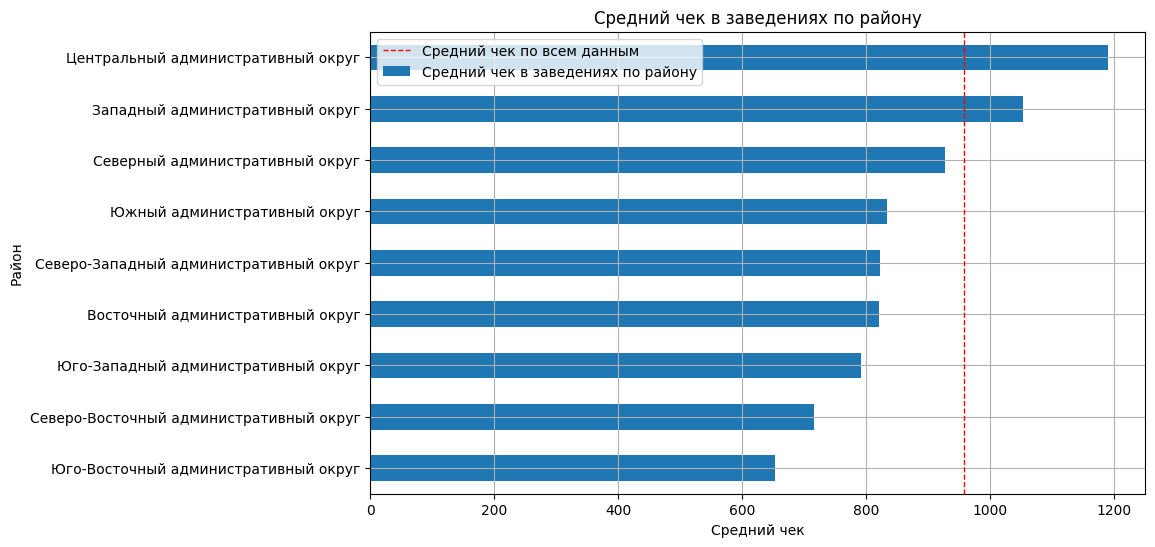

In [56]:
grouped = mean_avg_bill_by_district_table()
mean_avg_bill_by_district_barh(grouped)

На линейчатой диаграмме видно, что заведения с самым большим средним чеком - 1191 руб., находятся в Центральном административном округе, то есть в центре города. Далее идет Западный административный округ - 1053 руб. И самый низкий средний чек в Юго-Восточный административном округе - 654 руб.

### (доп) Вариация среднего чека заведения в зависимости от района Москвы

Для более полного представления рынка была составлена диаграмма, чтобы понять, как варьируется средний чек в зависимости от категории заведения.

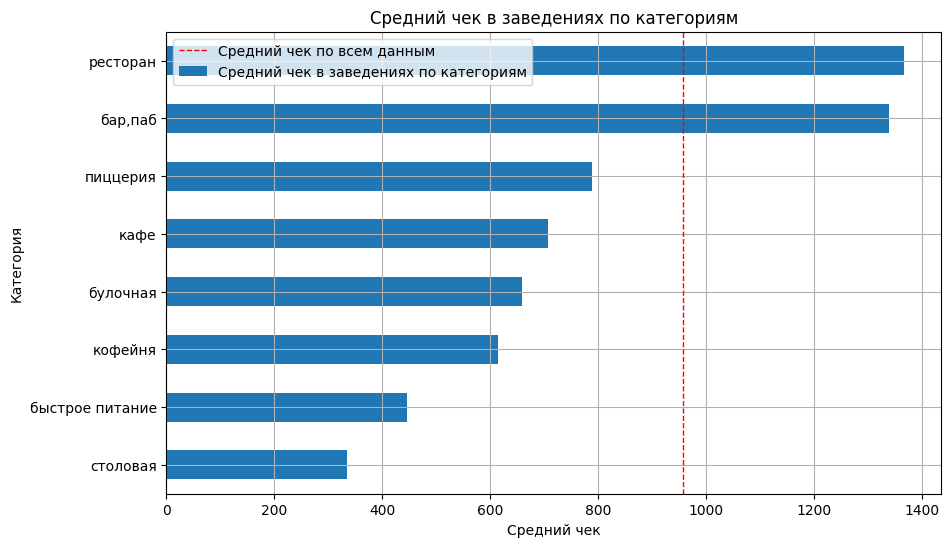

In [57]:
grouped = mean_avg_bill_by_category_table()
mean_avg_bill_by_category_barh(grouped)

На линейчатом графике видно что 2 категории занимают лидирующее место по величине среднего чека: ресторан - 1368 руб. и бар,паб - 1339 руб.. Наименьший средний чек представлен категорией столовая - 335 руб.

## Рекомендации

По результатам исследовательного анализа, можно обратить внимание на заведения категории 'бар, паб'.

Причины:
1. Малая конкуренция на рынке. Заведения категории 'бар, паб' представляют всего 9% рынка, что существенно меньше, чем заведения категорий кафе - 28%, ресторан - 24% и кофейни - 17% рынка.
2. Большой средний чек. Заведения категории 'бар, паб' имеют второй по величине, после категории 'ресторан' - 1368 руб., средний чек на рынке - 1339 руб.
3. Большой средний рейтинг. Среди всех, именно категория 'бар, паб' имеет самый высокий средний рейтинг - 4.39, то есть людям нравятся подобные заведения.
4. Большое количество посадочных мест. Категория 'бар, паб' вторая, после категории 'ресторан' - 82 места, по медианному количеству количеству посадочных мест - 80 мест.

Малая конкуренция на рынке, большой средний рейтинг подобных заведений, большой средний чек, а также, большое количество посадочных мест показывают что данная категория общепита имеет потенциал.

Месторасположение.
Следует обратить внимание на Западный административный округ, так как, в нем заметно меньше конкуренция (всего 850 заведений), чем в Центральном административном округе - 2242 заведения, при этом средний чек заведений данного района - 1053 руб. не намного уступает среднему чеку центра - 1191 руб.